https://www.analyticsvidhya.com/blog/2017/03/imbalanced-classification-problem/

Derived Variables - 
* AON (convert days to months)





Import Statements

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import os

# Download the data from GDrive

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 2.8MB/s 


Refer to this for the **dir_id**

https://stackoverflow.com/questions/48436959/how-to-upload-csv-file-and-use-it-from-google-drive-into-google-colaboratory?rq=1


https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

In [0]:
dir_id = "1SrJ8S1wXZ-eoTvuVCwjx6DZAg1p3lDdH"
file_list = drive.ListFile(
    {'q': "title contains 'telecom_churn_data.csv' and '1SrJ8S1wXZ-eoTvuVCwjx6DZAg1p3lDdH' in parents"}).GetList()

for f in file_list:
  print('title: %s, id: %s' % (f['title'], f['id']))

title: telecom_churn_data.csv, id: 1SWnADIda31mVFevFcfkGtcgBHTKKI94J


In [0]:
download_path = os.path.expanduser('~/data')
try:
  os.makedirs(download_path)
except FileExistsError:
  pass

In [0]:
# f['title']
data_set_name = "telecom_churn_data.csv" 
# f['id']
data_set_id = "1SWnADIda31mVFevFcfkGtcgBHTKKI94J"

output_file = os.path.join(download_path, data_set_name)
temp_file = drive.CreateFile({'id': data_set_id})
temp_file.GetContentFile(output_file)

In [0]:
print(output_file)

/root/data/telecom_churn_data.csv


In [0]:

# fusermount -u drive
# !google-drive-ocamlfuse drive

In [0]:
# with open(output_file1, 'r') as f:
#   print(f.read())

## Load data from local file

In [2]:
output_file = 'telecom_churn_data.csv'

#### Read the data to Dataframe

In [3]:
data = pd.read_csv(output_file)

In [4]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [5]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [6]:
data.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [7]:
len(data.mobile_number.unique())

99999

In [8]:
a = data.last_date_of_month_6.iloc[1]
print(a, type(a))


6/30/2014 <class 'str'>


In [9]:
# data.nunique(axis=1)

In [10]:
uni_6 = data.last_date_of_month_6.unique()
print(len(uni_6), uni_6)

uni_7 = data.last_date_of_month_7.unique()
print(len(uni_7), uni_7)

uni_8 = data.last_date_of_month_8.unique()
print(len(uni_8), uni_8)

uni_9 = data.last_date_of_month_8.unique()
print(len(uni_9), uni_9)

1 ['6/30/2014']
2 ['7/31/2014' nan]
2 ['8/31/2014' nan]
2 ['8/31/2014' nan]



*   Impute the missing 'nan' values in last_date_of_month_? with end data of the month
*   Convert into datetime object using pd.to_datetime



In [11]:
print(data.circle_id.nunique())
print(data.circle_id.unique())

1
[109]


circle_id => can be dropped

Below are variables which should be yes/no => categorical variables

*   fb_user_6	
*   fb_user_7
*   fb_user_8
*   fb_user_9

*   night_pck_user_6
*   night_pck_user_7
*   night_pck_user_8
*   night_pck_user_9

This can also be retained as '1' and '0' => better verify both the ways


In [12]:
print(data.fb_user_6.nunique())
print(data.fb_user_6.unique())

print(data.fb_user_7.nunique())
print(data.fb_user_7.unique())

print(data.fb_user_8.nunique())
print(data.fb_user_8.unique())

print(data.fb_user_9.nunique())
print(data.fb_user_9.unique())

2
[ 1. nan  0.]
2
[ 1. nan  0.]
2
[ 1. nan  0.]
2
[nan  1.  0.]


In [13]:
print(data.night_pck_user_6.nunique())
print(data.night_pck_user_6.unique())

print(data.night_pck_user_7.nunique())
print(data.night_pck_user_7.unique())

print(data.night_pck_user_8.nunique())
print(data.night_pck_user_8.unique())

print(data.night_pck_user_9.nunique())
print(data.night_pck_user_9.unique())

2
[ 0. nan  1.]
2
[ 0. nan  1.]
2
[ 0. nan  1.]
2
[nan  0.  1.]


Sort the columns for better understanding (all loc_, std_, etc., will come up in a better way)

In [14]:
df = data.reindex(sorted(data.columns), axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, aon to vol_3g_mb_9
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [16]:
# df.to_csv('telecom_churn_data1.csv')

In [17]:
cols = sorted(df.columns)
print(len(cols), type(cols), cols)

226 <class 'list'> ['aon', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'aug_vbc_3g', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'circle_id', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'ic_others_9', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'isd_ic_mou_9', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'isd_og_mou_9', 'jul_vbc_3g', 'jun_vbc_3g', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_mont

In [18]:
count_cols = [col for col in df.columns if 'count' in col]

print(len(count_cols), type(count_cols))
# count_cols

8 <class 'list'>


In [19]:
loc_cols = [col for col in df.columns if 'loc' in col]
print(len(loc_cols), type(loc_cols))

38 <class 'list'>


In [20]:
arpu_cols = [col for col in df.columns if 'arpu' in col]
print(len(arpu_cols), type(arpu_cols))

12 <class 'list'>


In [21]:
av_rech_amt_cols = [col for col in df.columns if 'av_rech_amt' in col]
print(len(av_rech_amt_cols), type(av_rech_amt_cols))

4 <class 'list'>


In [22]:
df.filter(like = "arpu", axis =1).columns

Index(['arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'arpu_3g_6',
       'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_6', 'arpu_7', 'arpu_8',
       'arpu_9'],
      dtype='object')

In [23]:
df.filter(like = "loc", axis =1).columns

Index(['loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'loc_ic_mou_9',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
       'loc_ic_t2f_mou_9', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_t2m_mou_9', 'loc_ic_t2o_mou',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_t2t_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8',
       'loc_og_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2m_mou_9', 'loc_og_t2o_mou', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9'],
      dtype='object')

In [24]:
df.filter(like = "amt", axis =1).columns

Index(['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'last_day_rch_amt_8', 'last_day_rch_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9'],
      dtype='object')

In [25]:
df.filter(like = "_6", axis =1).columns

Index(['arpu_2g_6', 'arpu_3g_6', 'arpu_6', 'av_rech_amt_data_6',
       'count_rech_2g_6', 'count_rech_3g_6', 'date_of_last_rech_6',
       'date_of_last_rech_data_6', 'fb_user_6', 'ic_others_6', 'isd_ic_mou_6',
       'isd_og_mou_6', 'last_date_of_month_6', 'last_day_rch_amt_6',
       'loc_ic_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2t_mou_6', 'loc_og_mou_6', 'loc_og_t2c_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2t_mou_6',
       'max_rech_amt_6', 'max_rech_data_6', 'monthly_2g_6', 'monthly_3g_6',
       'night_pck_user_6', 'offnet_mou_6', 'og_others_6', 'onnet_mou_6',
       'roam_ic_mou_6', 'roam_og_mou_6', 'sachet_2g_6', 'sachet_3g_6',
       'spl_ic_mou_6', 'spl_og_mou_6', 'std_ic_mou_6', 'std_ic_t2f_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2o_mou_6', 'std_ic_t2t_mou_6',
       'std_og_mou_6', 'std_og_t2c_mou_6', 'std_og_t2f_mou_6',
       'std_og_t2m_mou_6', 'std_og_t2t_mou_6', 'total_ic_mou_6',
       'total_og_mou_6', 'total_rech

In [26]:
df.filter(like = "date", axis =1).columns

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'last_date_of_month_6',
       'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9'],
      dtype='object')

In [27]:
# IGnore - this is wrong and unecessary
# total_rech_amt_6', 'total_rech_data_6','total_rech_num_6'
rech_6_manual = df.total_rech_data_6 + df.total_rech_num_6
print(rech_6_manual.equals(df.total_rech_amt_6))
df_temp = pd.concat([rech_6_manual, df.total_rech_amt_6, df.total_rech_data_6, df.total_rech_num_6], axis=1)
print(rech_6_manual[:10])
df_temp.head(10)

False
0    5.0
1    NaN
2    NaN
3    NaN
4    6.0
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
dtype: float64


,0,total_rech_amt_6,total_rech_data_6,total_rech_num_6
0,5.0,362,1.0,4
1,NaN,74,NaN,4
2,NaN,168,NaN,5
3,NaN,230,NaN,10
4,6.0,196,1.0,5
5,NaN,120,NaN,2
6,NaN,499,NaN,15
7,NaN,1580,NaN,5
8,NaN,437,NaN,19
9,NaN,220,NaN,4


In [28]:
arpu_6_vk = (df.arpu_2g_6 + df.arpu_3g_6+df.aug_vbc_3g)

In [29]:
arpu_6_vk.equals(df.arpu_6)

False

In [30]:
print(arpu_6_vk[:10])

0    454.74
1       NaN
2       NaN
3       NaN
4      0.00
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
dtype: float64


In [31]:
df.arpu_6[:10]

0     197.385
1      34.047
2     167.690
3     221.338
4     261.636
5      50.258
6     429.023
7    1069.180
8     378.721
9     119.518
Name: arpu_6, dtype: float64

In [32]:
print(df.arpu_2g_6[:10], df.arpu_3g_6[:10])

0    212.17
1       NaN
2       NaN
3       NaN
4      0.00
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: arpu_2g_6, dtype: float64 0    212.17
1       NaN
2       NaN
3       NaN
4      0.00
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: arpu_3g_6, dtype: float64


In [33]:

# computing Null Values 
df.isnull().sum()

aon                        0
arpu_2g_6              74846
arpu_2g_7              74428
arpu_2g_8              73660
arpu_2g_9              74077
arpu_3g_6              74846
arpu_3g_7              74428
arpu_3g_8              73660
arpu_3g_9              74077
arpu_6                     0
arpu_7                     0
arpu_8                     0
arpu_9                     0
aug_vbc_3g                 0
av_rech_amt_data_6     74846
av_rech_amt_data_7     74428
av_rech_amt_data_8     73660
av_rech_amt_data_9     74077
circle_id                  0
count_rech_2g_6        74846
count_rech_2g_7        74428
count_rech_2g_8        73660
count_rech_2g_9        74077
count_rech_3g_6        74846
count_rech_3g_7        74428
count_rech_3g_8        73660
count_rech_3g_9        74077
date_of_last_rech_6     1607
date_of_last_rech_7     1767
date_of_last_rech_8     3622
                       ...  
std_og_t2t_mou_8        5378
std_og_t2t_mou_9        7745
total_ic_mou_6             0
total_ic_mou_7

In [34]:
nul_percentage = round(100*(data.isnull().sum()/len(data.index)),2)

In [35]:
print((sorted(nul_percentage, reverse=True))[:41], len(nul_percentage))

[74.85, 74.85, 74.85, 74.85, 74.85, 74.85, 74.85, 74.85, 74.85, 74.85, 74.43, 74.43, 74.43, 74.43, 74.43, 74.43, 74.43, 74.43, 74.43, 74.43, 74.08, 74.08, 74.08, 74.08, 74.08, 74.08, 74.08, 74.08, 74.08, 74.08, 73.66, 73.66, 73.66, 73.66, 73.66, 73.66, 73.66, 73.66, 73.66, 73.66, 7.75] 226


In [36]:
len(nul_percentage[nul_percentage>70])

40

In [37]:
len(nul_percentage[nul_percentage>60])

40

In [38]:
len(nul_percentage[nul_percentage>6])

69

IT appears we can remove where there are more than 73% missing values

In [39]:
to_remove = nul_percentage[nul_percentage>73]

In [40]:
to_remove

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

But, below columns are of type categorical; When the data is not present we can safely assume the
user is not a night_pack or fb_user

so before dropping the columns, need further cleaning.

* night_pck_user_6            74.85
* night_pck_user_7            74.43
* night_pck_user_8            73.66
* night_pck_user_9            74.08
* fb_user_6                   74.85
* fb_user_7                   74.43
* fb_user_8                   73.66
* fb_user_9                   74.08

Before proceeding any further, lets do the following - 

Convert date columns to date objects

#### Drop columns 
* where there is only 1 unique value
* replace missing values in categorical variables with 0 (0-no, 1 - yes)

In [41]:
date_columns = list(df.filter(like = "date", axis =1).columns)
(date_columns)

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9']

In [42]:
categorical_columns = ['night_pck_user_6',
'night_pck_user_7',
'night_pck_user_8',
'night_pck_user_9',
'fb_user_6',
'fb_user_7',
'fb_user_8',
'fb_user_9']

print(type(categorical_columns), categorical_columns)

<class 'list'> ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']


In [43]:
numerical_columsn = [col for col in df.columns if col not in (categorical_columns+date_columns)]

In [44]:
print(len(numerical_columsn+date_columns+categorical_columns))
print(len(df.columns))

226
226


* where there is only 1 unique value

In [45]:
# for col in df.columns:
#     print(df[col].nunique)

unique_Values = df.apply(lambda x: x.nunique())

In [46]:
unique_Values.sort_values()[:20]

last_date_of_month_8    1
std_og_t2c_mou_9        1
std_og_t2c_mou_8        1
circle_id               1
last_date_of_month_6    1
last_date_of_month_7    1
last_date_of_month_9    1
std_og_t2c_mou_7        1
std_og_t2o_mou          1
std_ic_t2o_mou_9        1
std_og_t2c_mou_6        1
std_ic_t2o_mou_7        1
std_ic_t2o_mou_6        1
loc_ic_t2o_mou          1
loc_og_t2o_mou          1
std_ic_t2o_mou_8        1
fb_user_7               2
night_pck_user_9        2
night_pck_user_8        2
night_pck_user_7        2
dtype: int64

In [47]:
cols_to_delete = []

In [48]:
cols_to_delete = cols_to_delete + list(unique_Values[unique_Values==1].index)
print(cols_to_delete, type(cols_to_delete))

['circle_id', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'loc_ic_t2o_mou', 'loc_og_t2o_mou', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_og_t2o_mou'] <class 'list'>


#### consolidate
* Categorical Variables (replace missing values with 2)
* 0->No, 1-Yes, 2-Unknown

In [49]:
print(df[categorical_columns].nunique())
for col in categorical_columns:
    print(col, df[col].unique())

night_pck_user_6    2
night_pck_user_7    2
night_pck_user_8    2
night_pck_user_9    2
fb_user_6           2
fb_user_7           2
fb_user_8           2
fb_user_9           2
dtype: int64
night_pck_user_6 [ 0. nan  1.]
night_pck_user_7 [ 0. nan  1.]
night_pck_user_8 [ 0. nan  1.]
night_pck_user_9 [nan  0.  1.]
fb_user_6 [ 1. nan  0.]
fb_user_7 [ 1. nan  0.]
fb_user_8 [ 1. nan  0.]
fb_user_9 [nan  1.  0.]


In [50]:
# df[categorical_columns].fillna(2, inplace=True)
for col in categorical_columns:
    df[col].fillna(value=2, inplace=True)

In [51]:
print(df[categorical_columns].nunique())
for col in categorical_columns:
    print(col, df[col].unique())

night_pck_user_6    3
night_pck_user_7    3
night_pck_user_8    3
night_pck_user_9    3
fb_user_6           3
fb_user_7           3
fb_user_8           3
fb_user_9           3
dtype: int64
night_pck_user_6 [0. 2. 1.]
night_pck_user_7 [0. 2. 1.]
night_pck_user_8 [0. 2. 1.]
night_pck_user_9 [2. 0. 1.]
fb_user_6 [1. 2. 0.]
fb_user_7 [1. 2. 0.]
fb_user_8 [1. 2. 0.]
fb_user_9 [2. 1. 0.]


#### Categorical done

#### drop unique columsn where there is no variance 
* unique value = 1

In [52]:
df.shape

(99999, 226)

In [53]:
df.drop(labels=cols_to_delete, axis=1, inplace=True)

In [54]:
df.shape

(99999, 210)

check missing attributes

In [55]:
(round((df.isnull().sum(axis=0)/len(df.index))*100,2)).sort_values(ascending=False)[:45]

count_rech_3g_6             74.85
arpu_3g_6                   74.85
total_rech_data_6           74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
arpu_2g_6                   74.85
arpu_3g_7                   74.43
av_rech_amt_data_7          74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
date_of_last_rech_data_7    74.43
max_rech_data_7             74.43
total_rech_data_7           74.43
count_rech_2g_7             74.43
date_of_last_rech_data_9    74.08
av_rech_amt_data_9          74.08
count_rech_2g_9             74.08
arpu_3g_9                   74.08
max_rech_data_9             74.08
arpu_2g_9                   74.08
count_rech_3g_9             74.08
total_rech_data_9           74.08
max_rech_data_8             73.66
count_rech_3g_8             73.66
count_rech_2g_8             73.66
total_rech_data_8           73.66
av_rech_amt_data_8          73.66
arpu_3g_8     

# TODO
Analyse the recharge colums and fill missing values for 
"As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)."

In [60]:
df_temp = df[['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']]


In [61]:
df_temp.describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,7546.000000,4365.000000,4076.000000,4061.000000


In [63]:
(round((df_temp.isnull().sum(axis=0)/len(df_temp.index))*100,2))

total_rech_data_6     74.85
total_rech_data_7     74.43
total_rech_data_8     73.66
total_rech_data_9     74.08
av_rech_amt_data_6    74.85
av_rech_amt_data_7    74.43
av_rech_amt_data_8    73.66
av_rech_amt_data_9    74.08
dtype: float64

In [68]:
df.total_rech_data_6.fillna(value=0,inplace=True)
df.total_rech_data_7.fillna(value=0,inplace=True)
df.total_rech_data_8.fillna(value=0,inplace=True)
df.total_rech_data_9.fillna(value=0,inplace=True)

df.av_rech_amt_data_6.fillna(value=0, inplace=True)
df.av_rech_amt_data_7.fillna(value=0, inplace=True)
df.av_rech_amt_data_8.fillna(value=0, inplace=True)
df.av_rech_amt_data_9.fillna(value=0, inplace=True)

In [70]:
# df.filter(like = "rech_amt", axis =1).columns

In [71]:
# df['total_rech_data_6']

In [75]:
nul_percentage = (round((df.isnull().sum(axis=0)/len(df.index))*100,2))
nul_percentage[nul_percentage>70]

arpu_2g_6                   74.85
arpu_2g_7                   74.43
arpu_2g_8                   73.66
arpu_2g_9                   74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
dtype: float64

In [76]:
cols_to_drop = nul_percentage[nul_percentage>70].index

print(cols_to_drop)

Index(['arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'arpu_3g_6',
       'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9'],
      dtype='object')


In [78]:
df.drop(labels=cols_to_drop, axis=1, inplace=True)

In [79]:
df.shape

(99999, 186)

In [81]:
# df.total_rech_data_6

In [84]:
# df.av_rech_amt_data_6
a = df.total_rech_data_6 * df.av_rech_amt_data_6
print(len(a), type(a))

99999 <class 'pandas.core.series.Series'>


In [87]:
df['total_data_rech_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6
df['total_data_rech_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7
df['total_data_rech_8'] = df.total_rech_data_8 * df.av_rech_amt_data_8
df['total_data_rech_9'] = df.total_rech_data_9 * df.av_rech_amt_data_9

In [88]:
df.shape

(99999, 190)

In [96]:
cols_to_drop = ['total_rech_data_6', 'total_rech_data_7','total_rech_data_8','total_rech_data_9',
               'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']

In [97]:
print(cols_to_drop)

['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']


In [99]:
df.drop(labels=cols_to_drop, axis=1, inplace=True)

In [100]:
df.shape

(99999, 182)

In [101]:
df['total_amt_6'] = df.total_rech_amt_6 + df.total_data_rech_6
df['total_amt_7'] = df.total_rech_amt_7 + df.total_data_rech_7
df['total_amt_8'] = df.total_rech_amt_8 + df.total_data_rech_8
df['total_amt_9'] = df.total_rech_amt_9 + df.total_data_rech_9

In [102]:
df.shape

(99999, 186)

In [108]:
((df.total_amt_6 + df.total_amt_7)/2).isnull().sum()

0

In [109]:
df['av_amt_rech_6_7']=(df.total_amt_6 + df.total_amt_7)/2

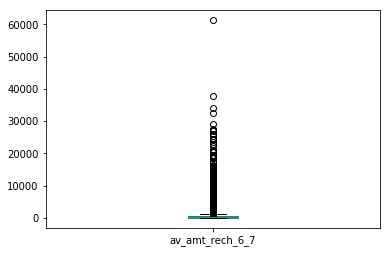

In [111]:
df['av_amt_rech_6_7'].plot.box()

In [113]:
df['av_amt_rech_6_7'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0        0.0
0.1       60.0
0.2      108.5
0.3      155.0
0.4      209.5
0.5      275.0
0.6      360.0
0.7      478.0
0.8      656.5
0.9     1028.0
1.0    61236.0
Name: av_amt_rech_6_7, dtype: float64

In [124]:
avg_amt_rech_2_mon = df['av_amt_rech_6_7'].quantile(0.7)

In [125]:
filter = df['av_amt_rech_6_7'] >= avg_amt_rech_2_mon

In [129]:
df = df[filter]

In [130]:
df.shape

(30001, 187)

In [132]:
df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].describe()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
count,30001.000000,30001.000000,30001.000000,30001.000000
mean,264.901497,500.869219,91.435910,349.513848
std,358.290694,666.902007,282.370006,947.079372
min,0.000000,0.000000,0.000000,0.000000
25%,50.480000,47.640000,0.000000,0.000000
50%,157.980000,284.940000,0.000000,0.000000
75%,343.540000,698.680000,38.000000,320.610000
max,7785.730000,11517.730000,8993.950000,39221.270000


In [ ]:
(df['total_ic_mou_9'] > 0) and (df['total_og_mou_9'] > 0) and (df['vol_2g_mb_9']>0) and (df['vol_3g_mb_9']>0)